<a href="https://colab.research.google.com/github/hungsvdut2k2/ML_Fundamental/blob/main/HousePricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
! pip install -q kaggle

**Dataset: Housing Dataset**

In [15]:
from google.colab import files 
datasets = files.upload()

Saving kaggle.json to kaggle.json


In [20]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [21]:
!chmod 600 /root/kaggle/kaggle.json

In [22]:
!kaggle datasets download -d ashydv/housing-dataset

  0% 0.00/4.63k [00:00<?, ?B/s]
100% 4.63k/4.63k [00:00<00:00, 4.25MB/s]


In [25]:
!unzip /content/housing-dataset.zip

Archive:  /content/housing-dataset.zip
  inflating: Housing.csv             


In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [27]:
df = pd.read_csv('/content/Housing.csv',index_col=False)

In [28]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [30]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


**Since we start with Linear Regression With One Variable,the columns we need to focus on are area and price**

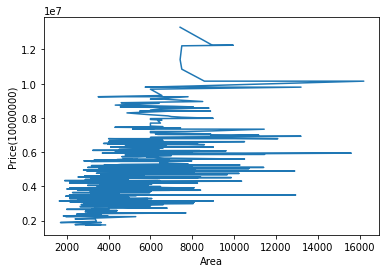

In [29]:
x = df['area'].to_numpy().reshape(-1, 1)
y = df['price'].to_numpy().reshape(-1, 1)
plt.plot(x, y)
plt.xlabel('Area')
plt.ylabel('Price(10000000)')
plt.show()

**With Linear Regression Model, we need to fit a straight line through all data in dataset**\
So that, our $f(x) = wx + b$\
**To deal with Linear Regression, we can use Gradient Descent**\
The main function is minimizing the cost function $J(w,b) = \frac{1}{2m}\Sigma^{m}_{i=1} ((wx^i + b) - y^i)$ with $(wx+ b)$ is the predicted value of model and y is the true value

$J(w,b) = \frac{1}{2m}\Sigma^{m}_{i=1} ((wx^i + b) - y^i)$\
$\frac{d}{dw}J(w,b) = \frac{1}{m}\Sigma^{m}_{i=1} ((wx^i + b) - y^i)x^i$\
$\frac{d}{db}J(w,b) = \frac{1}{m}\Sigma^{m}_{i=1} ((wx^i + b) - y^i)$

In [1]:
def loss_function(w, b, x, y):
  m = len(x)
  total_error = np.sum(np.power(np.dot(x, w) - y, 2)) / (2 * m)
  return total_error

In [2]:
def d_dw(w, b, x, y):
  m = len(x)
  total_value = np.sum(np.dot((np.dot(x, w) - y),x)) / m
  return total_value

In [35]:
def d_db(w, b, x, y):
  m = len(x)
  total_value = np.sum(np.dot(w, x) - y) / m
  return total_value

In [3]:
def gradient_descent(w, b, x, y, learning_rate, num_iteration):
  for i in range(num_iteration):
    temp_w = w - learning_rate * d_dw(w, b, x, y)
    temp_b = b - learning_rate * d_db(w, b, x, y)
    w = temp_w
    b = temp_b
    print(d_dw(w, b, x, y), d_db(w, b, x, y))
  return w,b

In [44]:
regr = LinearRegression()
regr.fit(x, y)

LinearRegression()

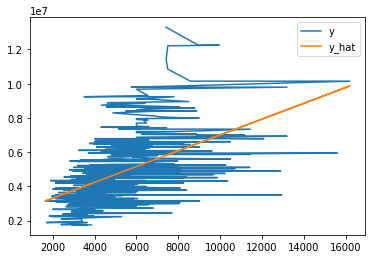

In [47]:
y_predicted = regr.predict(x)
plt.plot(x, y, label = 'y')
plt.plot(x, y_predicted, label = 'y_hat')
plt.legend()
plt.show()

**Linear Regression with one variable can't fit all data**